1 [1 2 3] 0.0
0.0 0.0
2 [2] 1.0
750.0 0.0
4 [1 2] 0.0
1250.0 -366.0254


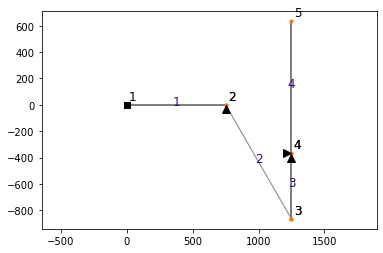

In [10]:
from parse_input import *

import sys
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    
    filename = 'ws_11_12.txt'
    
    # P A R S E  I N P U T  F I L E
    nodes, elements, propRod, propBeam, load, spc = parseInputFile('../input_files/'+filename)
          
    for eid in sorted(elements.keys()):
        #print(eid, elements[eid].elem_type)
        
        n1x = nodes[elements[eid].n1].x
        n1y = nodes[elements[eid].n1].y
        
        n2x = nodes[elements[eid].n1 + 1].x
        n2y = nodes[elements[eid].n1 + 1].y
        
        dx = (n1x + n2x)/2 # Mid position x of element
        dy = (n1y + n2y)/2 # Mid position y of element
        
        if elements[eid].elem_type == 'beam':
            elemWidth = 2
        else:
            elemWidth = 1

        plt.plot( [n1x,n2x],[n1y,n2y], linestyle='-', color='#808080', linewidth=elemWidth)
        plt.plot( [n1x,n2x],[n1y,n2y], marker='o', color='#F97306', markersize=3, linestyle='None')
        
        plt.annotate(str(int(elements[eid].n1)), (n1x,n1y), textcoords='offset points', xytext=(10,5), ha='right', fontsize = 12, color='black')
        plt.annotate(str(int(elements[eid].n2)), (n2x,n2y), textcoords='offset points', xytext=(10,5), ha='right', fontsize = 12, color='black')
        
        plt.annotate(str(int(eid)),(dx,dy), ha='center',fontsize = 12, color='#380282')
        
        plt.axis('equal')
        
    for nid in sorted(spc.keys()):
        for i in range(len(spc[nid])):
            print(nid, spc[nid][i].fixed_local_dof, spc[nid][i].value)
            if len(spc[nid][i].fixed_local_dof) == 3:
                print(nodes[int(nid)].x, nodes[int(nid)].y)
                plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y], marker='s', color='k')
            elif len(spc[nid][i].fixed_local_dof) == 2:
                print(nodes[int(nid)].x, nodes[int(nid)].y)
                plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y+(nodes[int(nid)].y*0.1)], marker='^', color='k',markersize=8)
                plt.plot( [nodes[int(nid)].x-(nodes[int(nid)].x*0.03)],[nodes[int(nid)].y], marker='>', color='k',markersize=8)
            else:
                print(nodes[int(nid)].x, nodes[int(nid)].y)
                if spc[nid][i].fixed_local_dof[0] == 1:
                    plt.plot( [nodes[int(nid)].x-(nodes[int(nid)].x*0.03)],[nodes[int(nid)].y], marker='>', color='k',markersize=8)
                if spc[nid][i].fixed_local_dof[0] == 2:
                    plt.plot( [nodes[int(nid)].x],[nodes[int(nid)].y-30], marker='^', color='k',markersize=8)